In [85]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

In [3]:
housing = pd.read_csv('BostonHousing.csv')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Wnioski:
- Możemy zauważyć, że wszystkie zmienne są zmiennymi ilościowymi
- Nie występują braki danych - wszystkie kolumny mają pełną liczbę (506) wartości

In [5]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Wnioski:
- Zmienne mają różne skale - trzeba będzie zastosować standaryzację
- Zmienna "medv", czyli mediana wartości domu jest ograniczona na poziomie 50. Zgodnie z notatką jest podzielona przez tysiąc.
- Zmienna "chas" - tu widać, że jest zmienną bool czyli ma wartości tylko 1 albo 0
- Zmienna "zn" (zgodnie z notatką) dotyczy działek powyżej 25,000 sq.ft. w innym przypadku ma wartość 0.

In [6]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot: >

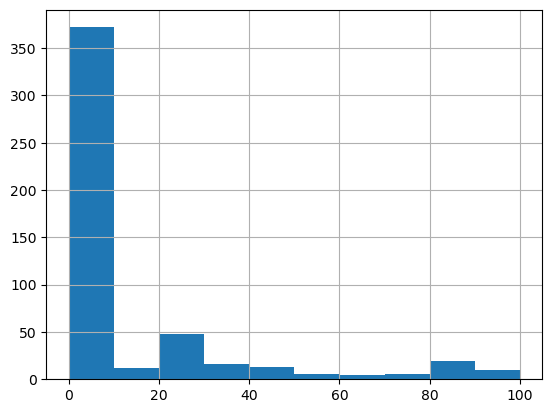

In [10]:
housing['zn'].hist(bins=10)

Wnioski:
- Widzimy, że znaczna większość działek ma wartość 0 ponieważ ma mniej niż 25,000 sq.ft

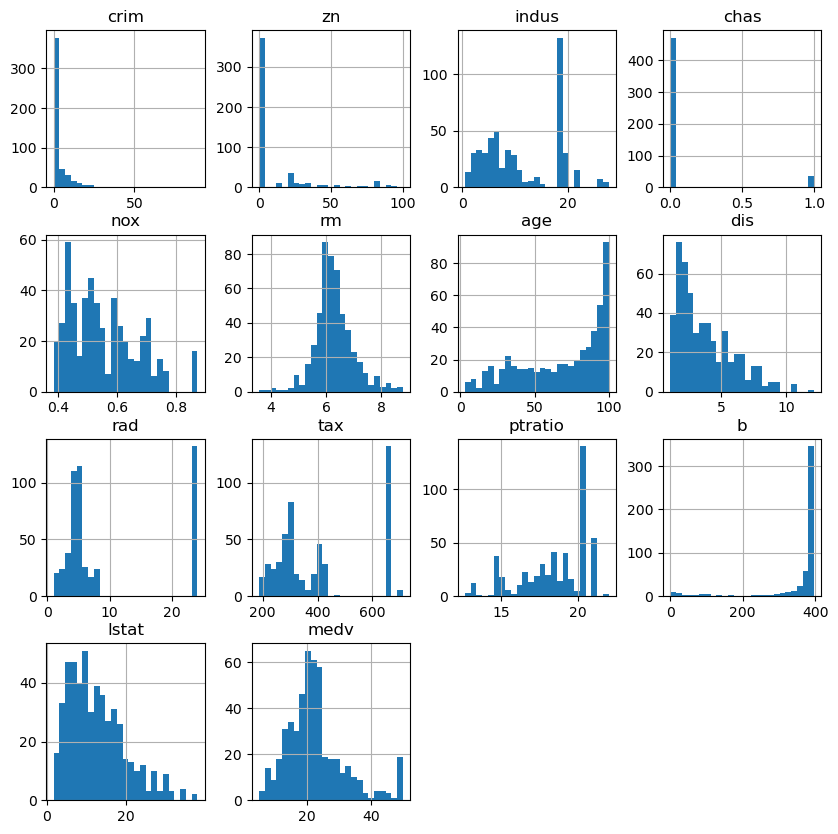

In [12]:
housing.hist(bins=25, figsize=(10, 10));

Wnioski:
- Zmienna "rad", czyli index odległości od autostrady ma nietypowy wykres - część wartości jest w przedziale od 1 - 11, a nastepnie wszystkie wartości są w 24

(array([ 20.,  24.,  38., 110., 115.,  26.,  17.,  24.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 132.]),
 array([ 1.  ,  1.92,  2.84,  3.76,  4.68,  5.6 ,  6.52,  7.44,  8.36,
         9.28, 10.2 , 11.12, 12.04, 12.96, 13.88, 14.8 , 15.72, 16.64,
        17.56, 18.48, 19.4 , 20.32, 21.24, 22.16, 23.08, 24.  ]),
 <BarContainer object of 25 artists>)

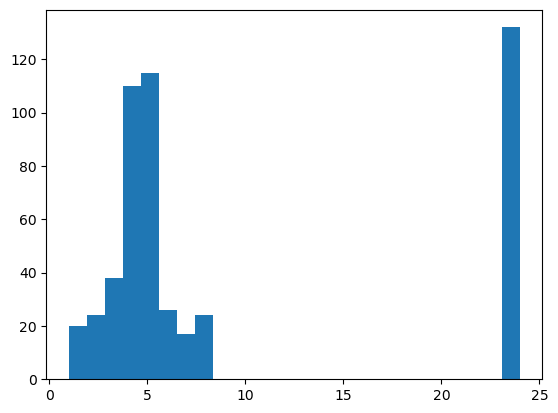

In [20]:
plt.hist(housing['rad'], bins=25)

<AxesSubplot: >

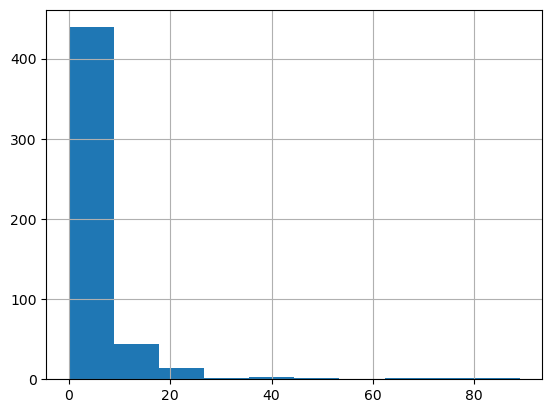

In [21]:
housing['crim'].hist()

<AxesSubplot: >

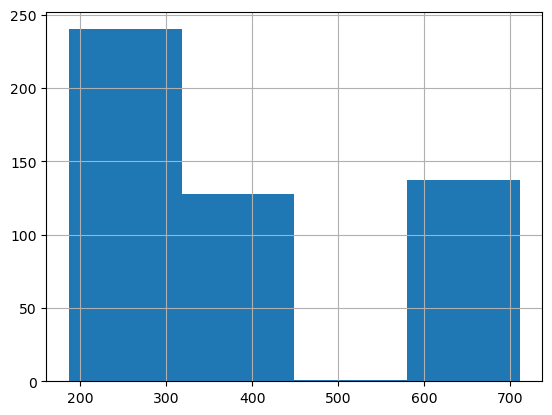

In [89]:
housing['tax'].hist(bins=4)

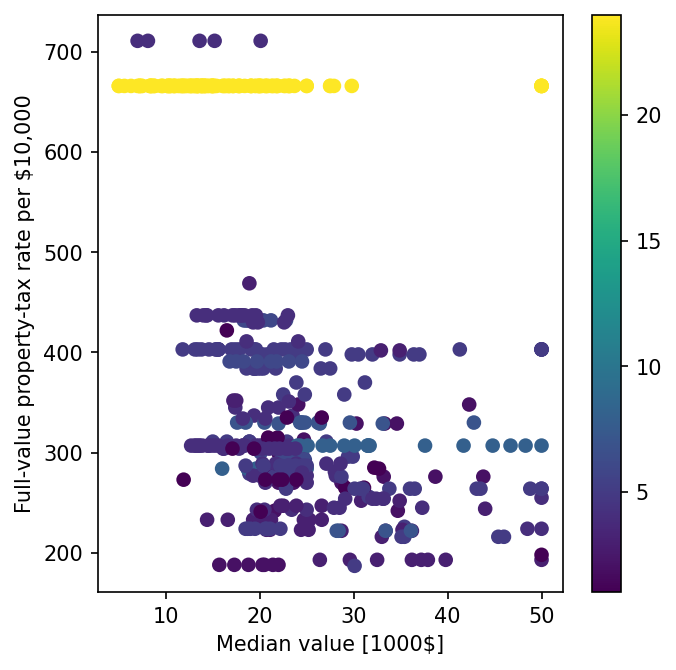

In [74]:
plt.figure(figsize=(5, 5), dpi=150)

plt.scatter(housing['medv'], housing['tax'], c=housing['rad'])
plt.colorbar()
plt.xlabel("Median value [1000$]")
plt.ylabel("Full-value property-tax rate per $10,000")
plt.show()

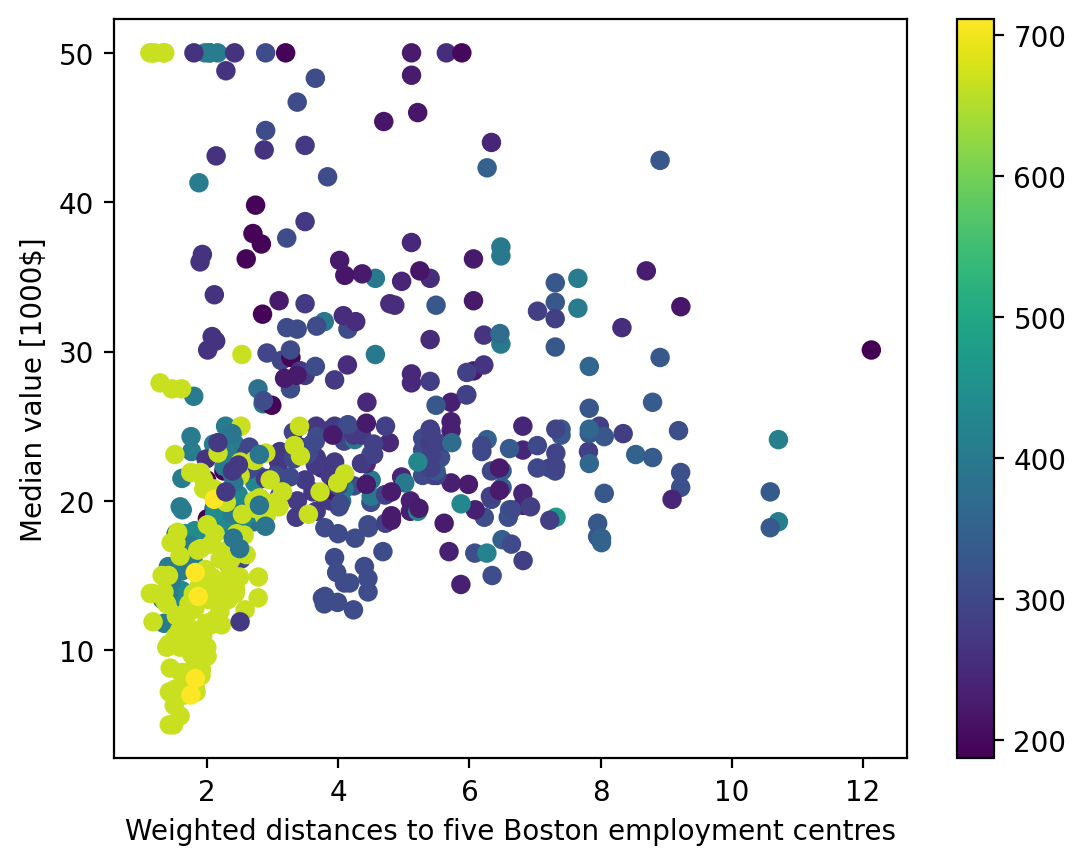

In [60]:
plt.figure(dpi=200)

plt.scatter(housing['dis'], housing['medv'], c=housing['tax'])
plt.colorbar()
plt.ylabel("Median value [1000$]")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.show()

In [72]:
corr_matrix = housing.corr().round(2)

<AxesSubplot: >

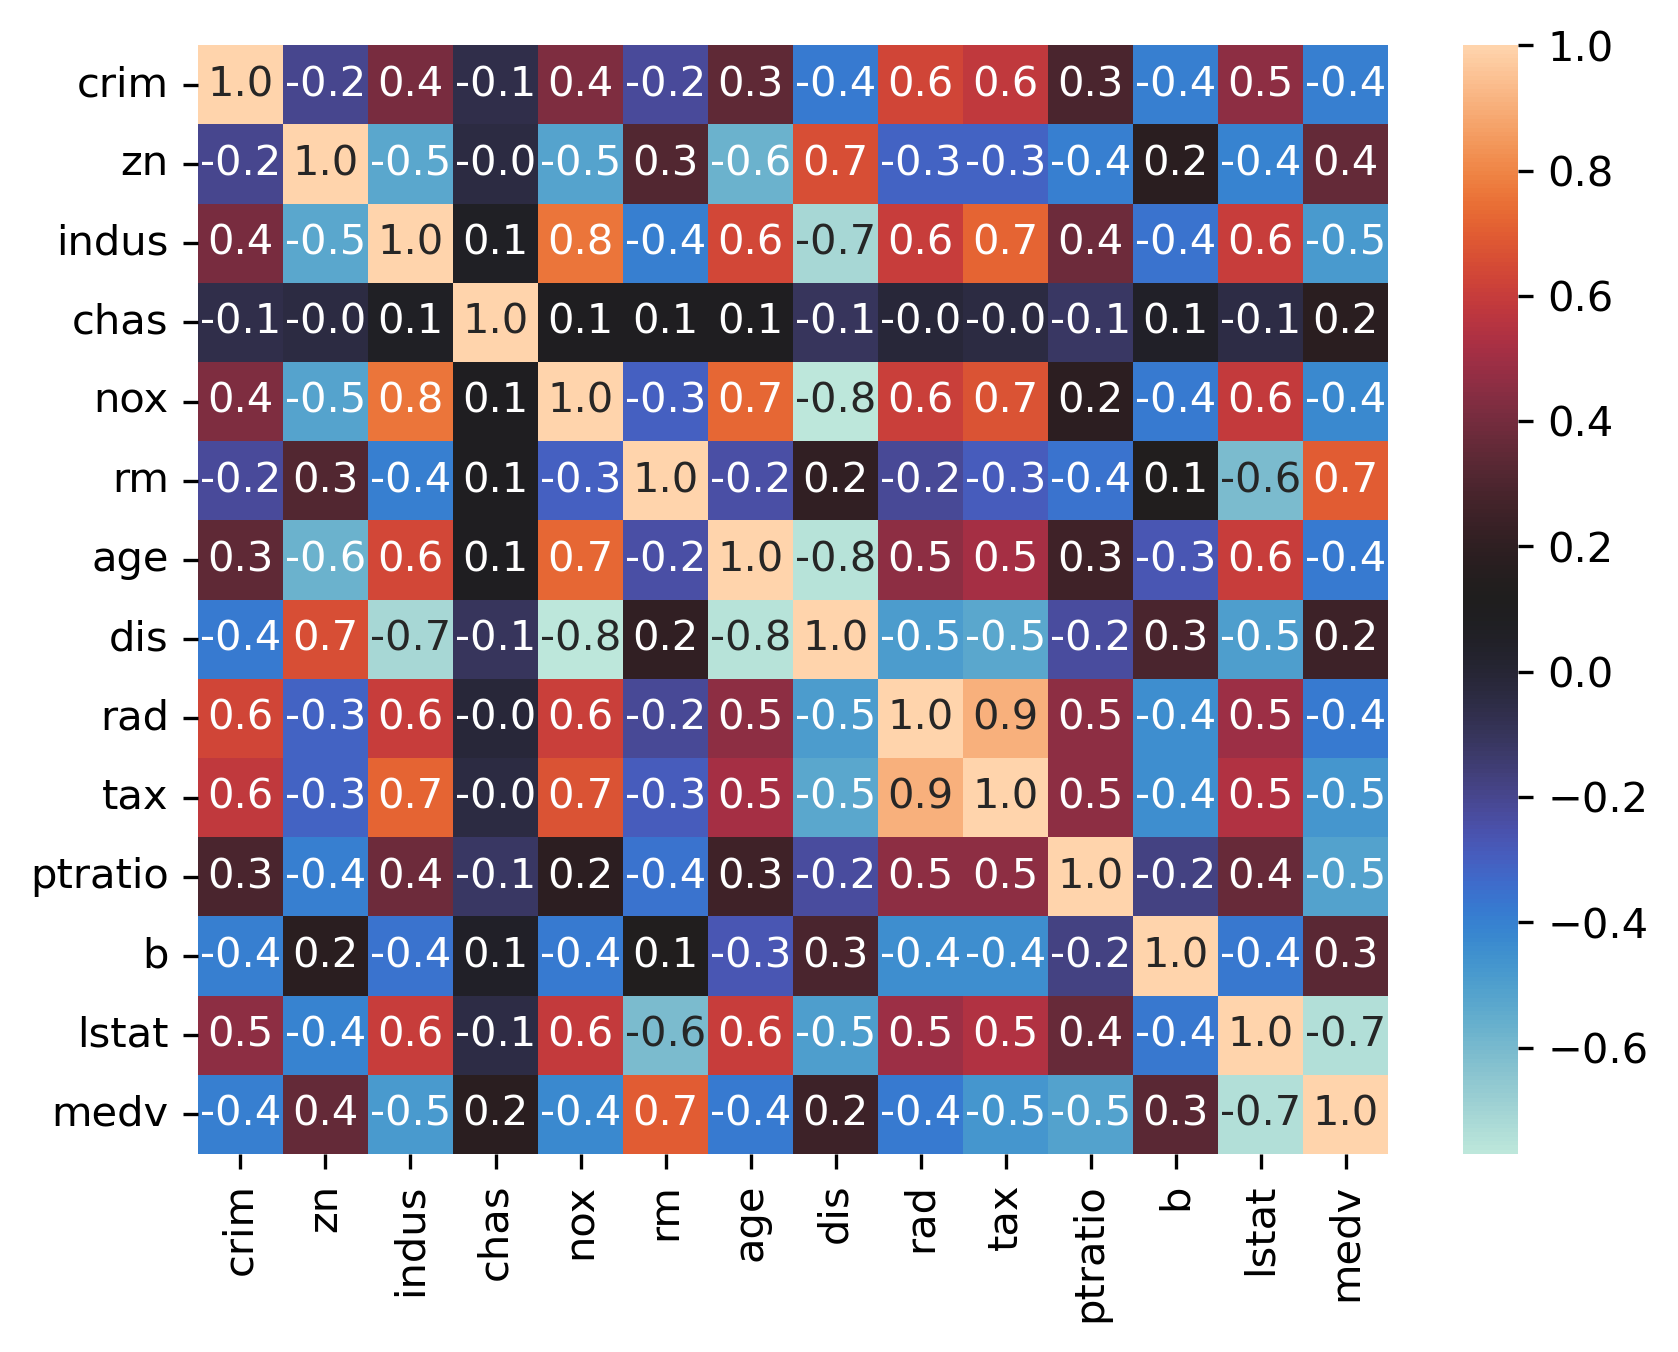

In [83]:
plt.figure(dpi=300)
sns.heatmap(corr_matrix, cmap="icefire", annot=True, fmt=".1f")

Wnioski:
- Na medianę wartości mieszkań wpływają 
    - Pozytywnie:
        - "rm" czyli średnia ilość pokoi
        - "zn" czyli ilość mieszkań
    - Negatywnie:
        - "lstat" odwrotnie proporcjonalnie, czyli zamożność społeczeństwa
        - "tax"
        - "indus" czyli ilość przemysłu blisko mieszkań
- Zmienna "chas" ma bardzo niską korelację z każdą inna zmienną
- Zmienne "tax" i "rad" są mocno skorelowane (na poziomie 0.9) co oznacza, że mieszkania bliżej autostrady są wyżej opodatkowane

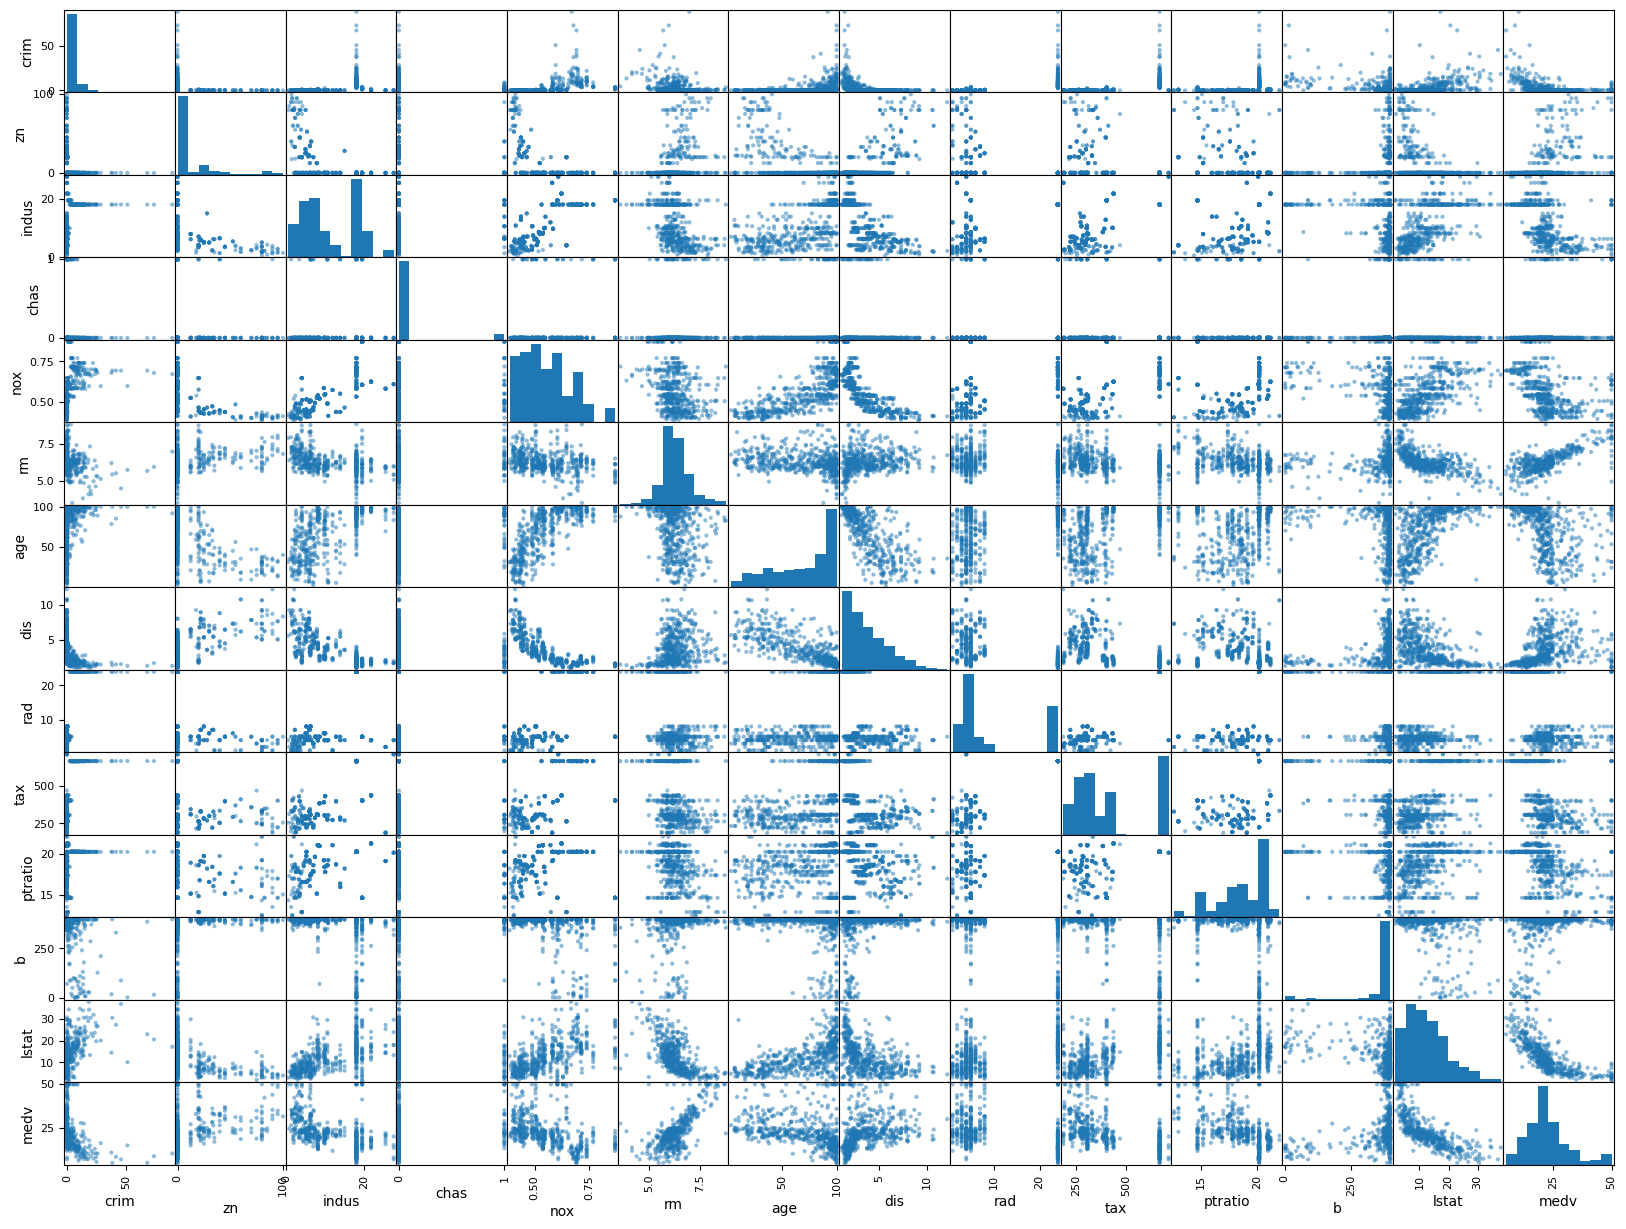

In [87]:
scatter_matrix(housing, figsize = (20, 15));# , color = "steelblue")

# Podział na zbiór treningowy i testowy

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
features = housing[list(set(housing.columns) - {"medv"})]

In [93]:
features.columns

Index(['chas', 'ptratio', 'indus', 'tax', 'zn', 'age', 'b', 'lstat', 'nox',
       'crim', 'rad', 'dis', 'rm'],
      dtype='object')

In [95]:
labels = housing["medv"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

In [106]:
y_train.head()

417    10.4
387     7.4
105    19.5
21     19.6
164    22.7
Name: medv, dtype: float64

# Stworzenie pipeline'a

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import set_config
set_config(display="diagram")

In [112]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])


# Trening modelu

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lin_reg = LinearRegression()

In [115]:
X_train_prepared = num_pipeline.fit_transform(X_train)

In [116]:
set_config(display="text")
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

# Test na próbkach

In [118]:
x = X_test.iloc[1:3]
y = y_test.iloc[1:3]

In [119]:
x

,chas,ptratio,indus,tax,zn,age,b,lstat,nox,crim,rad,dis,rm
410,0,20.2,18.10,666,0.0,100.0,2.60,10.11,0.597,51.13580,24,1.4130,5.757
499,0,19.2,9.69,391,0.0,73.5,395.77,15.10,0.585,0.17783,6,2.3999,5.569


In [120]:
y

410    15.0
499    17.5
Name: medv, dtype: float64

# Obliczanie błędu modelu

In [121]:
import math

from sklearn.metrics import mean_squared_error

y_train_pred = lin_reg.predict(X_train_prepared)

math.sqrt(mean_squared_error(y_train, y_train_pred))

4.610478603161136

Model osiąga RMSE na poziomie 4.61 przy zakresie od 0 do 50, co oznacza, że ma stosunkowo dosyć duży błąd.

In [122]:
X_test_prepared = num_pipeline.transform(X_test)

In [123]:
y_preds = lin_reg.predict(X_test_prepared)

In [124]:
math.sqrt(mean_squared_error(y_test, y_preds))

5.019502582627384

# K-krotny sprawdzian krzyżowy

In [126]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

rmse_scores

array([4.53971367, 5.55303093, 4.689718  , 5.56899318, 5.03131457,
       4.49560835, 4.40917484, 3.48629203, 6.79811661, 3.64770217])

In [127]:
rmse_scores.mean(), rmse_scores.std()

(4.8219664345648034, 0.9262011586201061)

K-krotny sprawdzian pozwala stwierdzić, że na zły wynik modelu nie wpływa inicjalizacja losowa w zły miejscu. 

# Metoda lasu losowego

In [128]:
from sklearn.ensemble import RandomForestRegressor

f_reg = RandomForestRegressor()

f_reg.fit(X_train_prepared, y_train)

np.sqrt(mean_squared_error(y_train, f_reg.predict(X_train_prepared)))

1.097317433021395

Metoda lasu losowego osiąga znacznie lepszy wynik.

In [129]:
scores = cross_val_score(f_reg, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

rmse_scores

array([3.10832868, 3.35402387, 2.69276544, 3.33832103, 2.61356592,
       2.52212343, 3.56252565, 2.59757558, 4.28443794, 2.93063658])

In [130]:
rmse_scores.mean(), rmse_scores.std()

(3.100430413555105, 0.5249504238515785)